# Imports and Reading

In [1]:
# for data read, manipulation and data analyses
import pandas as pd
import numpy as np
import scipy as scp

# for preprocessing data to machine learning model
from sklearn.preprocessing import StandardScaler, OneHotEncoder 

# for plots
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

_______________

# Data Cleaning and Data Analyses
1. Lets start the statistics analyses
2. I will check the dataframe searching for null values and create a strategy to deal with it

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Features description, you can search it [here](https://www.kaggle.com/c/titanic/data)

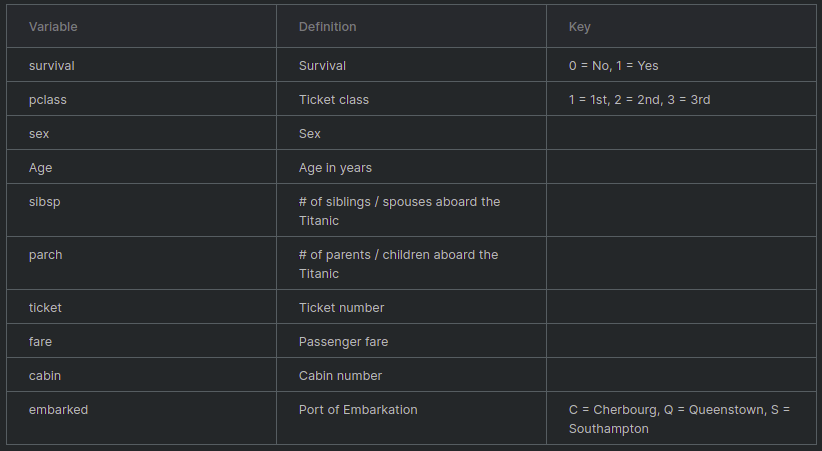

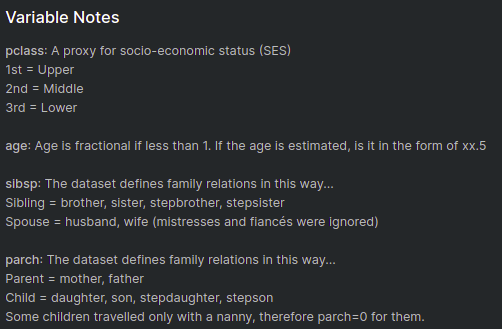

### The PassengerId column can be dropped becaus it dont give us any information

In [5]:
train.drop('PassengerId', axis = 1, inplace = True)

In [6]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### With this statistical matrix its possible to note that some important features as:
1. We have 891 registers for training
2. 38,38% os passengers are survived 
3. The mean age is nearby 30 years old, the passengers are young people
4. Something about passengers ages by Quartile
    1. 25% (Q1) of passengers are under 25 years old 
    2. 50% (Q2) of passengers are under of 28 years old
    3. 75% (Q3) of passengers are under of 38 years old
    4. and 100% of them are under 80 years old
5. And another statistics informations...

In [7]:
pd.crosstab(index = [train.Pclass, train.Sex], columns = train.Survived, margins = True)

Survived         0    1  All
Pclass Sex                  
1      female    3   91   94
       male     77   45  122
2      female    6   70   76
       male     91   17  108
3      female   72   72  144
       male    300   47  347
All            549  342  891

### Look the contingence table above, we can get some conclusions
- The Titanic disaster make 549 victims and 342 survivors
- The majority (near 2/3) of surviors are composed by female
- We have 94, 76 and 144 women in class 1, 2 and 3, respectively
- We have 122, 108 and 347 men in class 1, 2 and 3, respectively

_____________________

### Discritive Analyse of Age column without nan values filtered

In [8]:
print('Age mean:', np.mean(train.Age))
print('Age median:', np.median(train.Age.dropna()))
print('Age mode:', scp.stats.mode(train.Age)[0][0])
print('Age range:', train.Age.max() - train.Age.min())
print('Age standard deviation:', np.std(train.Age))
print('Age distribution skewness:', scp.stats.skew(train.Age.dropna()))
print('Age coefficient of variation:', scp.stats.variation(train.Age.dropna()))

Age mean: 29.69911764705882
Age median: 28.0
Age mode: 24.0
Age range: 79.58
Age standard deviation: 14.516321150817316
Age distribution skewness: 0.3882898514698657
Age coefficient of variation: 0.4887795429927496


In [9]:
# creating the frequency table with 8 intervals
freq_table_age = pd.crosstab(pd.cut(train.Age, bins = 8), train.Sex)

male_female_sum = freq_table_age[['male', 'female']].sum(axis = 1) # the sum of count of each sex

freq_table_age['All'] = male_female_sum # creating the total sum of each line

# creating the relative frequency column and round it
freq_table_age['relative_freq (%)'] = np.round(100 * male_female_sum / male_female_sum.sum())

# creating the acumulative frequency column
freq_table_age['acumulative_freq (%)'] = freq_table_age['relative_freq (%)'] # take the same values of relative freq
for i in range(len(freq_table_age) - 1):
    # recursive incrementing of relative frequency
    freq_table_age.loc[freq_table_age.index[i+1], 'acumulative_freq (%)'] += freq_table_age.loc[freq_table_age.index[i], 'acumulative_freq (%)'] 

freq_table_age

Sex,female,male,All,relative_freq (%),acumulative_freq (%)
Age,,,,,
"(0.34, 10.368]",31,33,64,9.0,9.0
"(10.368, 20.315]",46,69,115,16.0,25.0
"(20.315, 30.263]",81,149,230,32.0,57.0
"(30.263, 40.21]",55,100,155,22.0,79.0
"(40.21, 50.158]",31,55,86,12.0,91.0
"(50.158, 60.105]",14,28,42,6.0,97.0
"(60.105, 70.052]",3,14,17,2.0,99.0
"(70.052, 80.0]",0,5,5,1.0,100.0


### Observations 1:
1. The mean and median are nearby values, therefore the outliers have a softly impact
2. The mean is 29.7 with a error of 14.51 years-old
3. Note that skewness is a positive value then the distorcion of the normal distribution of age tends to the left

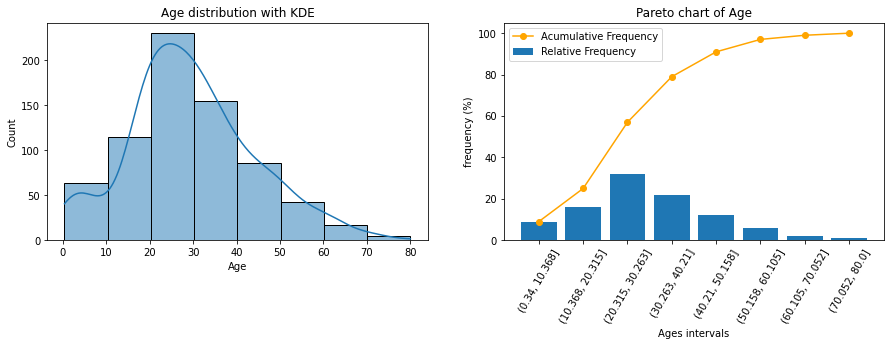

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (15, 4))

# histogram with KDE (left chart)
sns.histplot(train.Age, bins = 8, ax = ax[0], kde = True)
ax[0].set_title('Age distribution with KDE')

# Pareto chart (right chart)
ax[1].bar(x = range(len(freq_table_age)), height = freq_table_age['relative_freq (%)'])
plt.xticks(range(8), freq_table_age.index, rotation = 60)
plt.xlabel('Ages intervals')
plt.ylabel('frequency (%)')
ax[1].plot(freq_table_age['acumulative_freq (%)'].values, marker = 'o', c = 'orange')
ax[1].set_title('Pareto chart of Age')
ax[1].legend(['Acumulative Frequency', 'Relative Frequency'])

Text(0.5, 1.0, 'Ages distribution')

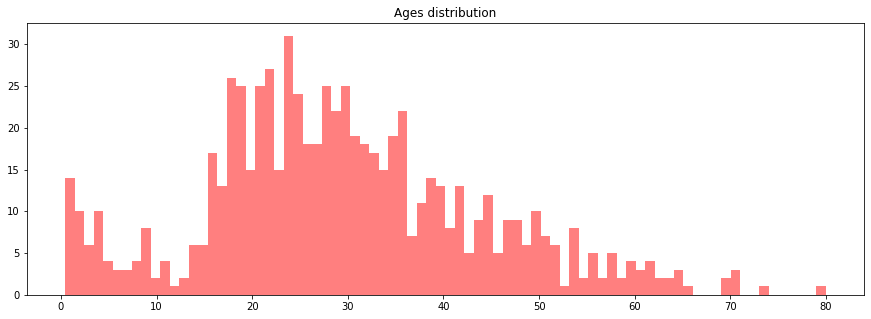

In [11]:
plt.figure(figsize = (15, 5))
train['Age'].hist(bins = 80, grid = False, color= 'red', alpha = .5)
plt.title('Ages distribution')

<AxesSubplot:xlabel='Age', ylabel='Density'>

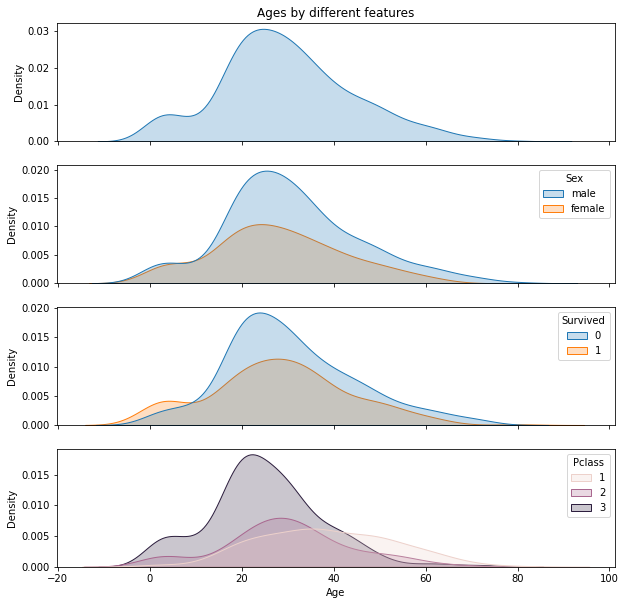

In [12]:
fig, ax = plt.subplots(4, 1, figsize = (10, 10), sharex = True)
sns.kdeplot(train.Age, ax = ax[0], fill = True)
ax[0].set_title('Ages by different features')
sns.kdeplot(train.Age, hue = train.Sex, ax = ax[1], fill = True)
sns.kdeplot(train.Age, hue = train.Survived, ax = ax[2], fill = True)
sns.kdeplot(train.Age, hue = train.Pclass, ax = ax[3], fill = True)

In [13]:
# creating the frequency table with 8 intervals
freq_table_age_pclass = pd.crosstab(pd.cut(train.Age, bins = 8), train.Pclass)

male_female_sum = freq_table_age_pclass[[1, 2, 3]].sum(axis = 1) # the sum of count of each sex

freq_table_age_pclass['All'] = male_female_sum # creating the total sum of each line

# creating the relative frequency column and round it
freq_table_age_pclass['relative_freq (%)'] = np.round(100 * male_female_sum / male_female_sum.sum())

# creating the acumulative frequency column
freq_table_age_pclass['acumulative_freq (%)'] = freq_table_age_pclass['relative_freq (%)'] # take the same values of relative freq
for i in range(len(freq_table_age_pclass) - 1):
    # recursive incrementing of relative frequency
    freq_table_age_pclass.loc[freq_table_age_pclass.index[i+1], 'acumulative_freq (%)'] += freq_table_age_pclass.loc[freq_table_age_pclass.index[i], 'acumulative_freq (%)'] 

freq_table_age_pclass

Pclass,1,2,3,All,relative_freq (%),acumulative_freq (%)
Age,,,,,,
"(0.34, 10.368]",3,17,44,64,9.0,9.0
"(10.368, 20.315]",18,18,79,115,16.0,25.0
"(20.315, 30.263]",40,61,129,230,32.0,57.0
"(30.263, 40.21]",49,43,63,155,22.0,79.0
"(40.21, 50.158]",37,19,30,86,12.0,91.0
"(50.158, 60.105]",25,12,5,42,6.0,97.0
"(60.105, 70.052]",11,3,3,17,2.0,99.0
"(70.052, 80.0]",3,0,2,5,1.0,100.0


Text(0.5, 1.0, 'Ages by Sex and Pclass')

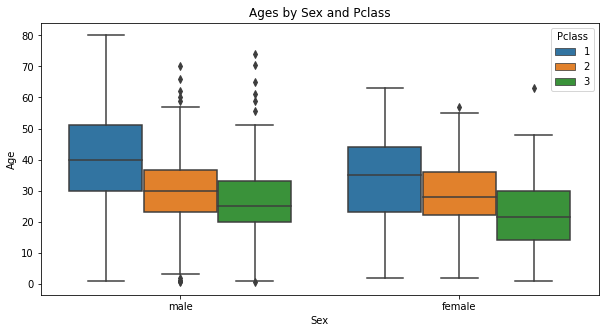

In [14]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = train.Sex, y = train.Age, hue = train.Pclass)
plt.title('Ages by Sex and Pclass')

### Observations 2:
1. The persons between 21 and 31 years-old represents near 30% of all passengers and 55% of passengers have ages between 10 years-old and 40 years-old
2. The average age of the first class is slightly higher than in the other classes

______________

### Discritive Analyse of Sex column

<AxesSubplot:ylabel='Sex'>

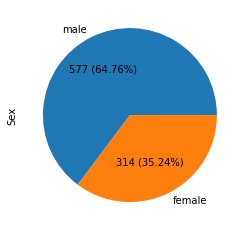

In [15]:
train.Sex.value_counts().plot.pie(autopct = lambda p : f'{(p * len(train)/100):,.0f} ({p:.2f}%)  ')

In [16]:
freq_table_age_pclass = pd.crosstab(pd.cut(train.Age, bins = 8), train.Pclass)

<AxesSubplot:>

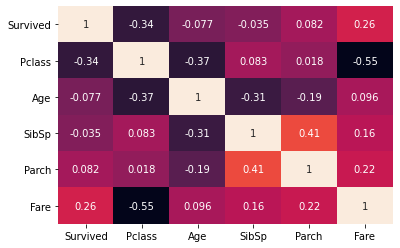

In [17]:
sns.heatmap(train.corr(), cbar= False, annot=True)

### Its possible to note some importants informations as:
1. As we expected, there is a small positive correlation between the Fare and Survived columns, something nearby 0.26 positive, that is, this two columns are directly proportional around 26%. This information could be important later
2. Pclass and Survived columns have a inversaly proportional relation around 34%.
3. Another important information is that Age column have a inversely proportional relationship with Pclass column around 37%
4. The relationship between SibSp and Parch is obvius like the relationship between Fare and Pclass

______________________________________

# Time to verify the null values, how much have and how solve this problem 


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

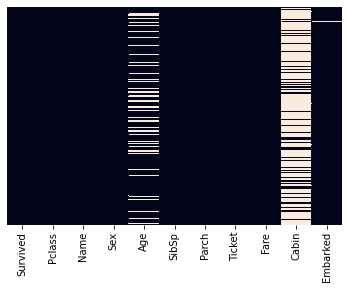

In [18]:
sns.heatmap(train.isnull(), cbar= False, yticklabels = False)
train.shape[0] - train.count()

### Notice that we have 177 null values at Age column, 687 at Cabin column and 2 at Embarked column. Above we have the counts and a heatmap to a best visualization. How we see, the Cabin column can be a problem

Before trating this null values, we need understand the data to create a way do fill this null values with something that make sense

### Note that the passenger ages follow a normal distribution, so could be a good strategy do fill the null values at Age column with ages values that follow a normal distribution. But we have some observations:
1. The normal distribution represents a natural dispersion of ages, we must maintain this natural distribution of this column
2. There are 177 null values at Age column, so we need 177 random samples that follow the normal distribution
3. The mean age is 29.7 years old, and the standard deviation is 14.51
4. We need a array with 177 values that follow the normal distribution with mean near 29.7 and stardard deviation near 14.51
5. The normal distribuition represents the natual values appear

(27.93220338983051, 12.944729625935649)

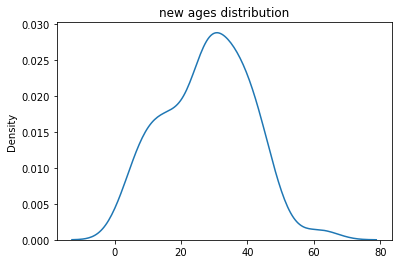

In [19]:
mu, sigma = np.mean(train.Age), np.std(train.Age) # mean and standard deviation
new_ages = np.abs(np.random.normal(mu, sigma, 177)).astype(int) # ages are int values and need to be positive values

sns.kdeplot(new_ages)
plt.title('new ages distribution')

# mean and standard deviation of new ages values, notice that values is near of original ages values
np.mean(new_ages), np.std(new_ages) 

(29.348114478114475, 14.235420006179195)

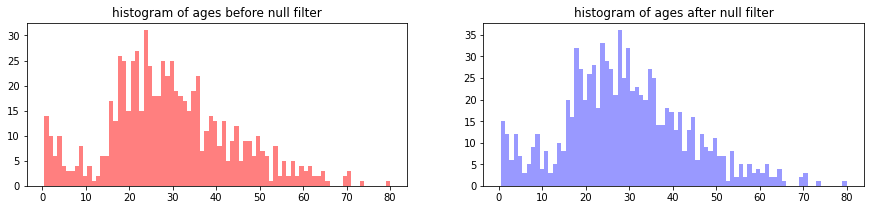

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (15, 3))
train['Age'].hist(bins = 80, grid = False, color= 'red', alpha = .5, ax = ax[0])
ax[0].set_title('histogram of ages before null filter')

nan_index = np.where(np.isnan(train.Age))

for i, j in np.dstack((nan_index, new_ages[np.random.permutation(177)]))[0]:
    train.loc[i, 'Age'] = j
    
train['Age'].hist(bins = 80, grid = False, color= 'blue', alpha = .4, ax = ax[1])
ax[1].set_title('histogram of ages after null filter')

np.mean(train.Age), np.std(train.Age) # new mean and std

### Notice that the strategy appear work well, now we dont have null values and Age column maintained its original appearance and distribution. Now we have a mean equal 29.72, near the previous mean (29.7) and a standard deviation equal 14.59, near the previous standard deviation (14.51)

<AxesSubplot:>

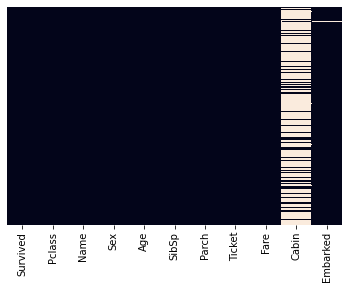

In [21]:
sns.heatmap(train.isnull(), cbar= False, yticklabels = False)

### How you see, there no more null values in Age column

_________________

### Now we have another problem to solve: the Cabin column
The Cabin column is a big problem because we have a lot of null values, so we will try to find some feature to solve it. Below we have the values of Cabin column, how we can see is a letter with a number and it is not possible to draw many conclusions, only that the letter indicates the cabin and that the number supposedly indicates some wing of the cabin. First, let's ignore the number and just take the letter, like it 'C201' turn 'C' only or 'B41 B32' turn 'B'

In [22]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [23]:
train.loc[train.Cabin.dropna().index, 'Cabin'] = train.Cabin.dropna().apply(lambda x: x[0])

In [24]:
train.Cabin.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

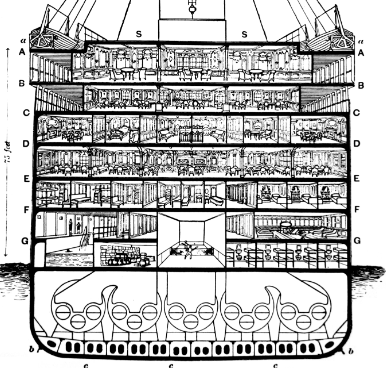

If you look above, the Titanic have seven Cabins (A to G), the upper cabins was most expensive than lower cabins (how you see below in mean column). And this make sense brecause the first class and second class (upper cabins) was most expensive than third class (lower cabins). There is the T cabin, but this cabin be associated with a only one man, so we can ignore it.

Maybe we can use de below table to select the cabin of people that dont have a Cabin based in your fare. This could be a good strategy. 

This image was taken of [wikimedia commons](https://commons.wikimedia.org/wiki/Main_Page). 
<br> The full image is [here](https://upload.wikimedia.org/wikipedia/commons/8/84/Titanic_cutaway_diagram.png). 

In [25]:
train.groupby(['Cabin', 'Pclass']).describe()['Fare']

count        mean         std      min       25%       50%  \
Cabin Pclass                                                               
A     1        15.0   39.623887   17.975333   0.0000  30.84790  35.50000   
B     1        47.0  113.505764  109.301500   0.0000  57.00000  80.00000   
C     1        59.0  100.151341   70.225588  26.5500  42.50210  83.47500   
D     1        29.0   63.324286   26.172260  25.9292  39.40000  75.25000   
      2         4.0   13.166675    0.420829  12.8750  12.96875  13.00000   
E     1        25.0   55.740168   30.386910  25.5875  26.55000  55.00000   
      2         4.0   11.587500    1.283469  10.5000  10.50000  11.42500   
      3         3.0   11.000000    2.554775   8.0500  10.26250  12.47500   
F     2         8.0   23.750000   11.631239  10.5000  12.37500  26.00000   
      3         5.0   10.611660    6.566714   7.6500   7.65000   7.65000   
G     3         4.0   13.581250    3.601222  10.4625  10.46250  13.58125   
T     1         1.0   35.500000         NaN  35.5000  35.50000  35.50000   

                     75%       max  
Cabin Pclass                        
A     1        50.247900   81.8583  
B     1       120.000000  512.3292  
C     1       143.591650  263.0000  
D     1        77.958300  113.2750  
      2        13.197925   13.7917  
E     1        61.175000  134.5000  
      2        12.512500   13.0000  
      3        12.475000   12.4750  
F     2        29.250000   39.0000  
      3         7.750000   22.3583  
G     3        16.700000   16.7000  
T     1        35.500000   35.5000

<AxesSubplot:xlabel='Cabin', ylabel='count'>

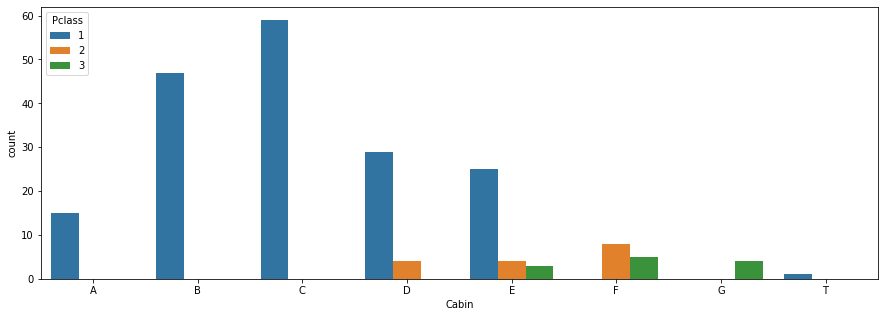

In [26]:
plt.figure(figsize = (15, 5))
sns.countplot(x = train.Cabin.dropna(), order = 'ABCDEFGT', hue = train.Pclass)

### Note above that the cabins A, B and C have only first class, D have second and third class, E have the three class, F have second and third class and we supose that G have only third class. This is a good information, we can use it to fill the null values on Cabin column based on passenger class.

__________________

### The majority of tickets is a number, but have some samples that we dont have only a number, but number and letters like 'A/5 21171' or 'PC 17599'. We dont know what the letters means, so we can ignore the letters and take only the number because the numbers could be help us

In [27]:
train.iloc[:, 8] = train.Ticket.apply(lambda x: x.split(' ')[1] if ' ' in x else x)

### Note that they have 'Wick' as their last name and both have the same Ticket and Fare, so this is a strong clue that are from the same family, consequently, we can assume that they belong to the same cabin. We can fill the null value at cabin column of Mrs. George row with C. This not will solve the problem, but is a way to fill some null values in this column. The most important information is that if the ticket is the same, the cabin is the same too (look to the 'Fortune' Familly)

In [28]:
train[train.Name.str.contains(pat = 'Wick')] # select all names that have 'Wick' on name

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
318,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,36928,C,S
856,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,36928,NaN,S


In [29]:
train[train.Name.str.contains(pat = 'Fortune')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,19950,C,S
88,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,19950,C,S
341,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,19950,C,S
438,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,19950,C,S


In [30]:
# creating a association between ticket and cabin 
ticket_cabin_ass = np.dstack((train.dropna().Ticket, train.dropna().Cabin))[0] 
ticket_cabin_ass[:5]

array([['PC 17599', 'C'],
       ['113803', 'C'],
       ['17463', 'E'],
       ['PP 9549', 'G'],
       ['113783', 'C']], dtype=object)

In [31]:
for index in train.index:
    try:
        pass_ticket = train.iloc[index, 8]
        # return cabin value by ticket
        cabin = ticket_cabin_ass[np.where(ticket_cabin_ass[:, 0] == pass_ticket)][:, 1][0] 
        train.iloc[index, 10] = cabin
    except:
        pass # ticket not in ticket_cabin_ass cause error

### We had 687 null values on Cabin column, now we have 676, this strategy did not work well but now we are sure of 11 cabins that were empty :D

### Maybe is better exclude this column becase we have a lot of null values and is not possible do identify a pattern on this feature

In [32]:
train.drop('Cabin', axis = 1, inplace = True)

_____________________

### Note that we have some prefixes on the Name column like Mr., Miss., Mrs. and stuff, maybe this can give us some information. Firsty we need to separate the prefixe from the name


In [33]:
# get the name, split the names and save 
prefix = train.Name.apply(lambda x: x.split(' ')[1][:-1]) # tan

In [34]:
prefix

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [35]:
prefix.value_counts()[:10]

Mr        502
Miss      179
Mrs       121
Master     40
Dr          7
Rev         6
            4
Impe        3
Planke      3
Gordon      2
Name: Name, dtype: int64

(-0.5, 4.5)

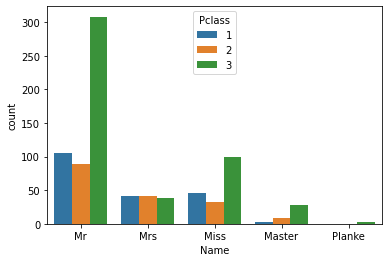

In [36]:
sns.countplot(x = prefix, hue = train.Pclass)
plt.xlim(-0.5, 4.5) # show the five first prefix by amount

(-0.5, 4.5)

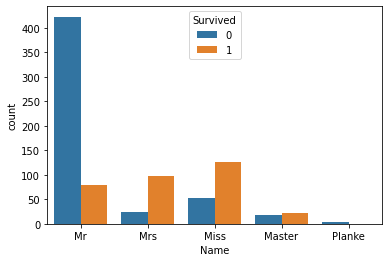

In [37]:
sns.countplot(x = prefix, hue = train.Survived)
plt.xlim(-0.5, 4.5)